In [1]:
import numpy as np
from pySVDD import SVDD
import matplotlib.pyplot as plt

Generate some example data with two classes

In [2]:
from sklearn import datasets
X,y = datasets.make_moons(n_samples = 100, noise = 0.2, random_state = 42)
y = 2*y - 1 # Rescale labels to be {-1,1}

Fit the SVDD

In [3]:
clf = SVDD(0.5,3.).fit(X,y)

Plot the SVDD decision threshold

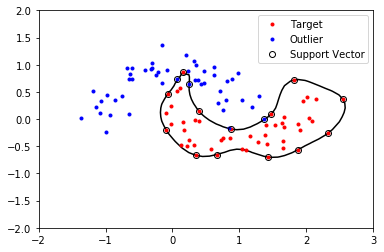

In [4]:
# Create variable mesh
num = 50
x1 = np.linspace(-2., 3., num = num)
x2 = np.linspace(-2., 2., num = num)
X1, X2 = np.meshgrid(x1, x2)
inp = np.hstack((X1.reshape((num*num,1)), X2.reshape((num*num,1))))

# Get decision threshold
R2 = clf.decision_function(inp)

# Plot decision threshold contour
C = R2.reshape((num,num))
plt.contour(X1, X2, C, levels = [0], colors = 'black')

# Plot data points
plt.plot(X[y==1,0],X[y==1,1],'r.', label = 'Target')
plt.plot(X[y==-1,0],X[y==-1,1],'b.', label = 'Outlier')

# Plot support vectors
plt.plot(clf.support_vectors_[:,0],clf.support_vectors_[:,1],'ko', label = 'Support Vector', mfc='none')
plt.legend()
plt.show()